In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [2]:
data = pd.read_csv('time_series_2019-ncov-Confirmed.csv')

In [3]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15,101,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36,138,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.25,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5,112.5,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306


In [4]:
len(data)

487

In [5]:
data = data.drop(columns=['Lat','Long'])
data

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,2,3,5,7,8,8,14,14,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,2,1,2,2,4,4,7,7,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,0,1,3,3,4,5,7,7,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,0,0,0,3,4,4,4,7,...,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,NaN,Dominica,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
483,NaN,Grenada,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
484,NaN,Mozambique,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
485,NaN,Syria,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
data = data.groupby('Country/Region').sum()

In [7]:
data = data.stack().unstack(0)
data

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/18/20,22,59,74,39,0,1,79,84,568,1646,...,0,14,113,2642,50,15,36,75,2,0
3/19/20,22,64,87,53,0,1,97,115,681,2013,...,0,16,140,2716,79,23,42,85,2,0
3/20/20,24,70,90,75,1,1,128,136,791,2388,...,0,29,140,4014,94,33,42,91,2,1
3/21/20,24,76,139,88,2,1,158,160,1071,2814,...,1,47,153,5067,110,43,70,94,2,3


In [8]:
data['date'] = data.index

In [9]:
data

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,date
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1/22/20
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1/23/20
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1/24/20
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1/25/20
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,2,0,0,1/26/20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/18/20,22,59,74,39,0,1,79,84,568,1646,...,14,113,2642,50,15,36,75,2,0,3/18/20
3/19/20,22,64,87,53,0,1,97,115,681,2013,...,16,140,2716,79,23,42,85,2,0,3/19/20
3/20/20,24,70,90,75,1,1,128,136,791,2388,...,29,140,4014,94,33,42,91,2,1,3/20/20
3/21/20,24,76,139,88,2,1,158,160,1071,2814,...,47,153,5067,110,43,70,94,2,3,3/21/20


In [10]:
data['day'] = pd.to_datetime(data.date, format='%Y%m%d', infer_datetime_format=True)
data

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,date,day
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1/22/20,2020-01-22
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,1/23/20,2020-01-23
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,1/24/20,2020-01-24
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,1/25/20,2020-01-25
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,1/26/20,2020-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/18/20,22,59,74,39,0,1,79,84,568,1646,...,113,2642,50,15,36,75,2,0,3/18/20,2020-03-18
3/19/20,22,64,87,53,0,1,97,115,681,2013,...,140,2716,79,23,42,85,2,0,3/19/20,2020-03-19
3/20/20,24,70,90,75,1,1,128,136,791,2388,...,140,4014,94,33,42,91,2,1,3/20/20,2020-03-20
3/21/20,24,76,139,88,2,1,158,160,1071,2814,...,153,5067,110,43,70,94,2,3,3/21/20,2020-03-21


In [11]:
data.set_index('day', inplace = True, drop = True)

In [12]:
data.drop(columns = ['date'], inplace = True)

In [13]:
criteria = data.astype(bool).sum(axis=1)

In [14]:
criteria

day
2020-01-22      6
2020-01-23      8
2020-01-24      9
2020-01-25     11
2020-01-26     13
             ... 
2020-03-18    151
2020-03-19    155
2020-03-20    162
2020-03-21    166
2020-03-22    171
Length: 61, dtype: int64

In [15]:
count = 0
i = 0
for x in criteria:
    if x > 120:
        count += 1
print(count)

9


In [16]:
data.drop(data.index[:50], inplace = True)

In [17]:
data

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
day,,,,,,,,,,,,,,,,,,,,,
2020-03-12,7,23,24,1,0,0,19,4,128,302,...,0,1,85,459,0,0,0,39,0,0
2020-03-13,7,33,26,1,0,1,31,8,200,504,...,0,3,85,802,0,0,0,47,0,0
2020-03-14,11,38,37,1,0,1,34,18,250,655,...,0,3,85,1144,4,0,2,53,0,0
2020-03-15,16,42,48,1,0,1,45,26,297,860,...,0,3,98,1145,4,1,10,56,0,0
2020-03-16,21,51,54,2,0,1,56,52,377,1018,...,0,7,98,1551,8,6,17,61,0,0
2020-03-17,22,55,60,39,0,1,68,78,452,1332,...,0,14,98,1960,29,10,33,66,0,0
2020-03-18,22,59,74,39,0,1,79,84,568,1646,...,0,14,113,2642,50,15,36,75,2,0
2020-03-19,22,64,87,53,0,1,97,115,681,2013,...,0,16,140,2716,79,23,42,85,2,0
2020-03-20,24,70,90,75,1,1,128,136,791,2388,...,0,29,140,4014,94,33,42,91,2,1


In [46]:
country_plot = data.astype(bool).sum(axis=1)
country_plot

day
2020-03-12    114
2020-03-13    120
2020-03-14    134
2020-03-15    139
2020-03-16    144
2020-03-17    147
2020-03-18    151
2020-03-19    155
2020-03-20    162
2020-03-21    166
2020-03-22    171
dtype: int64

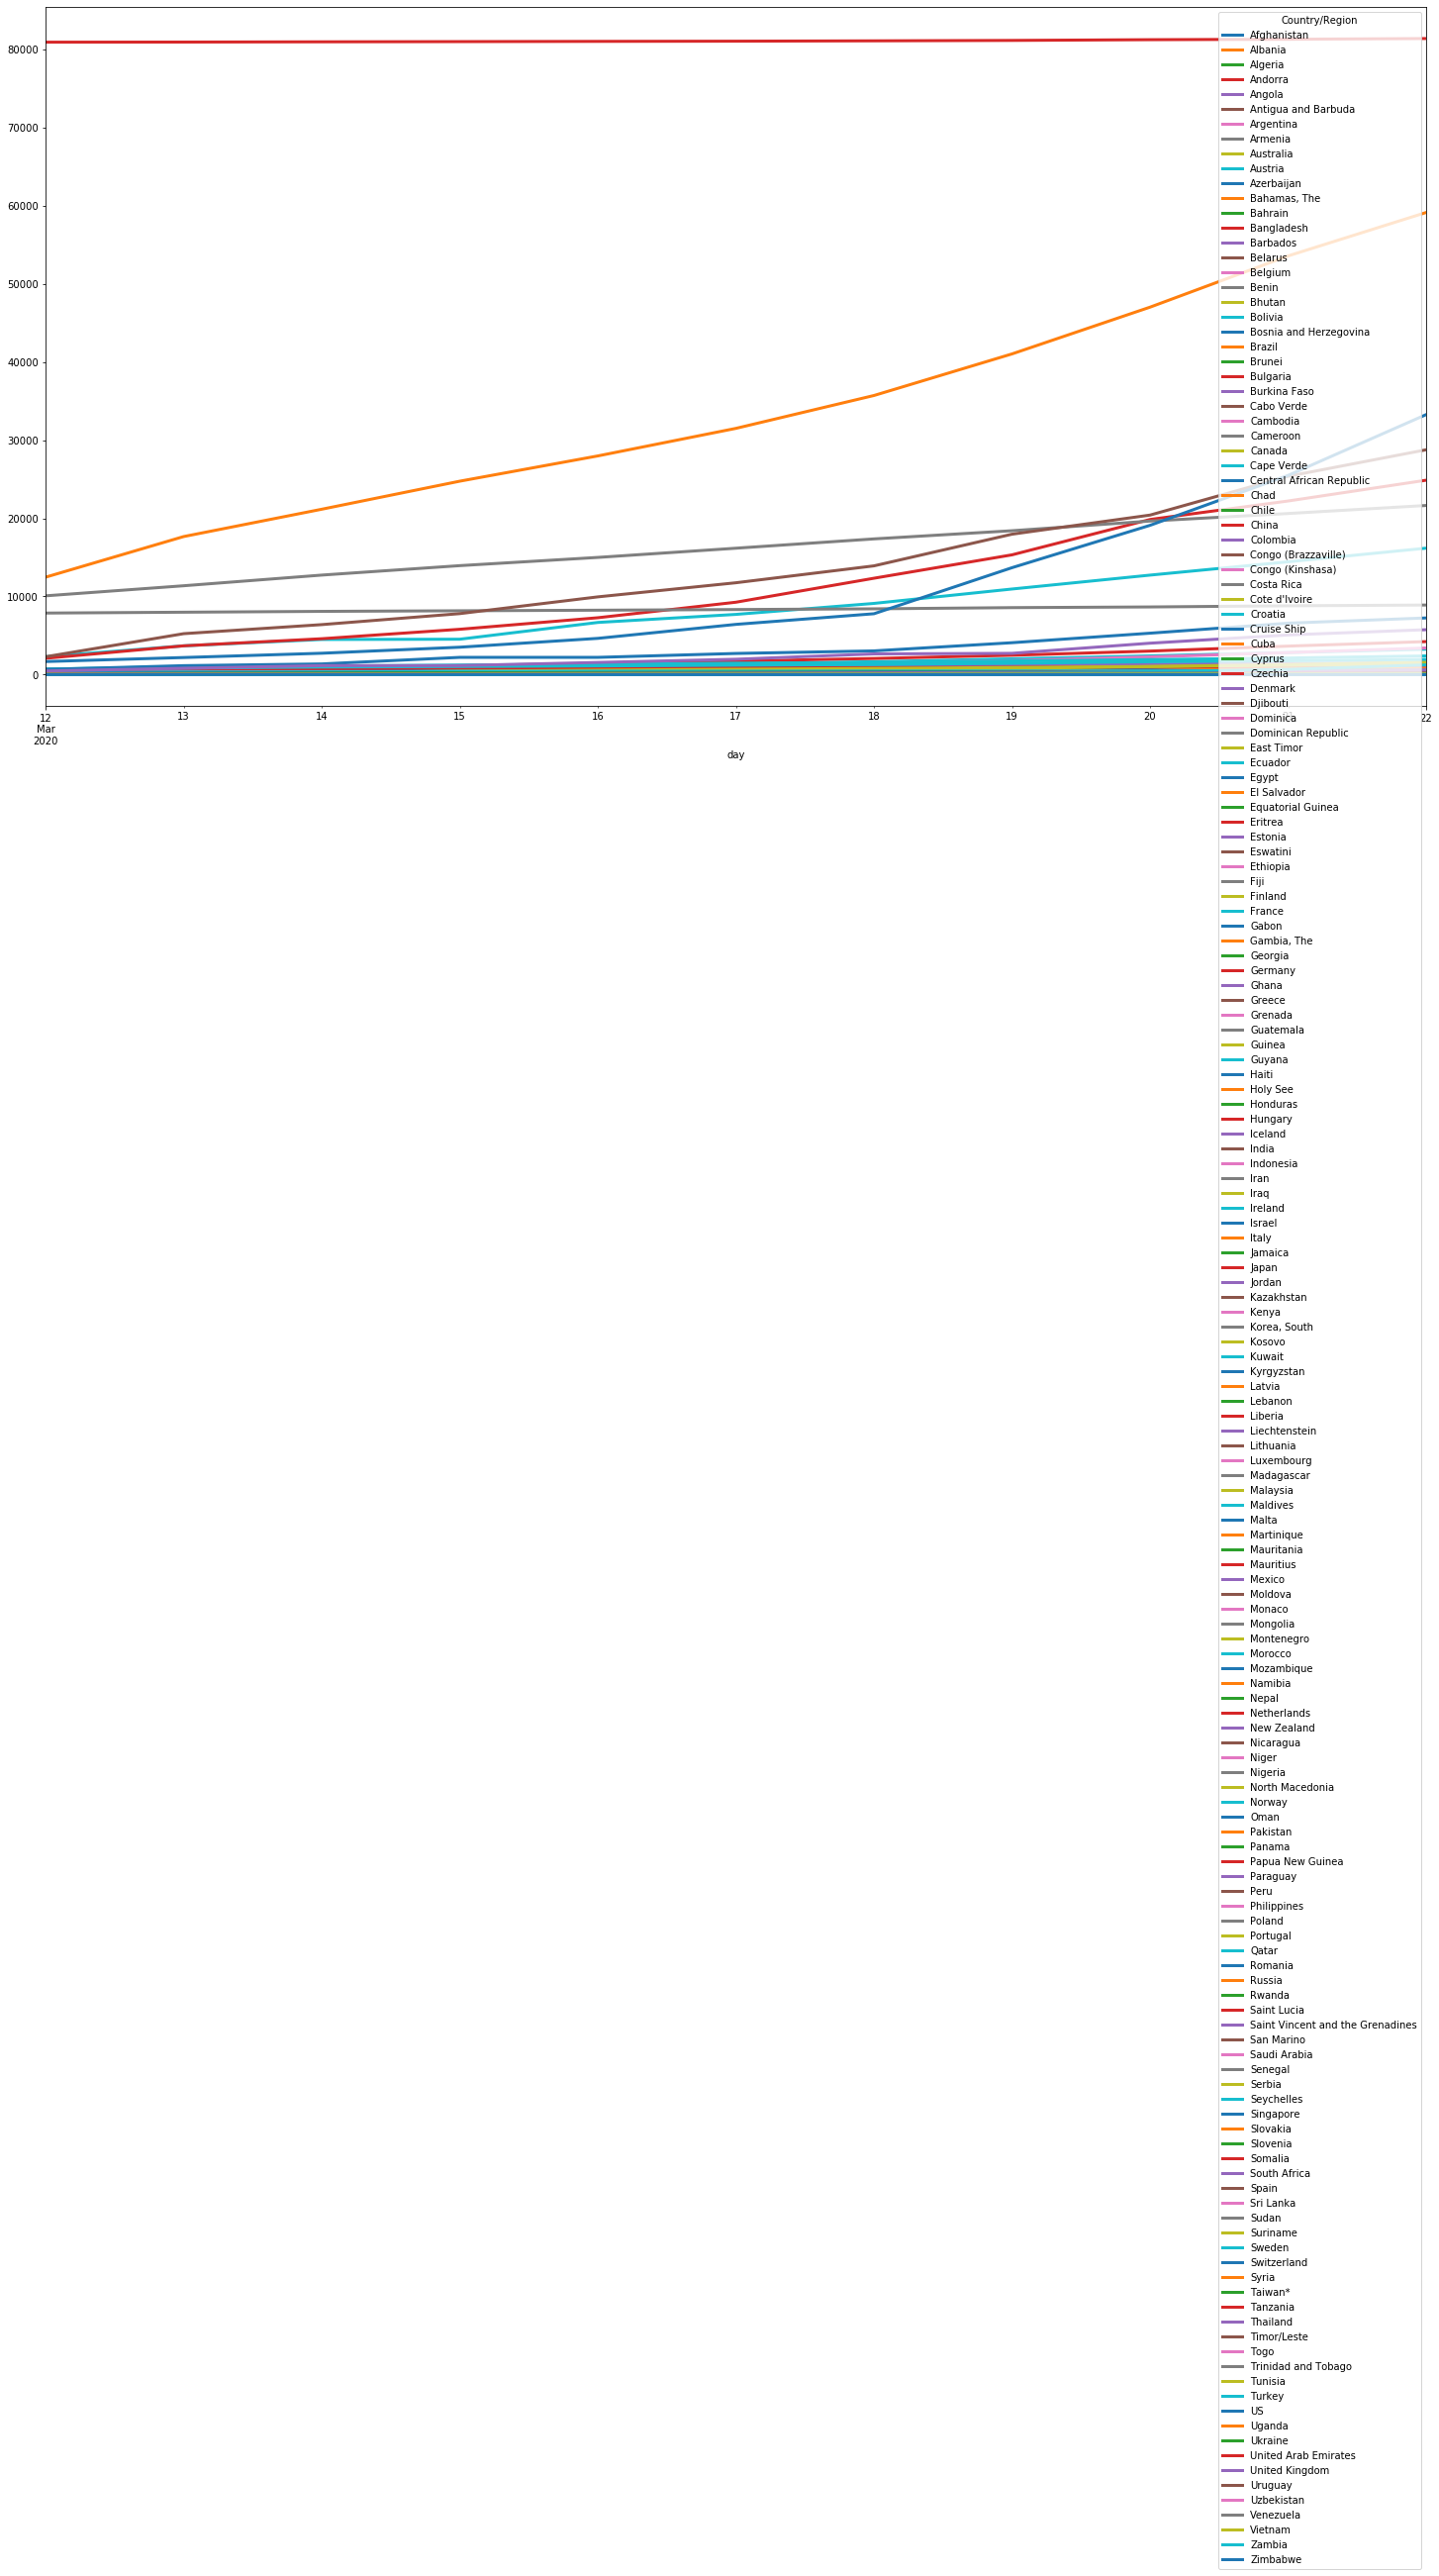

In [51]:
date_plot = data.plot(figsize =(25, 13), linewidth = 3, alpha = 1)

In [19]:
data_country = data.stack().unstack(0)
data_country

day,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22
Country/Region,,,,,,,,,,,
Afghanistan,7,7,11,16,21,22,22,22,24,24,40
Albania,23,33,38,42,51,55,59,64,70,76,89
Algeria,24,26,37,48,54,60,74,87,90,139,201
Andorra,1,1,1,1,2,39,39,53,75,88,113
Angola,0,0,0,0,0,0,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,0,0,0,1,6,10,15,23,33,43,43
Venezuela,0,0,2,10,17,33,36,42,42,70,70
Vietnam,39,47,53,56,61,66,75,85,91,94,113


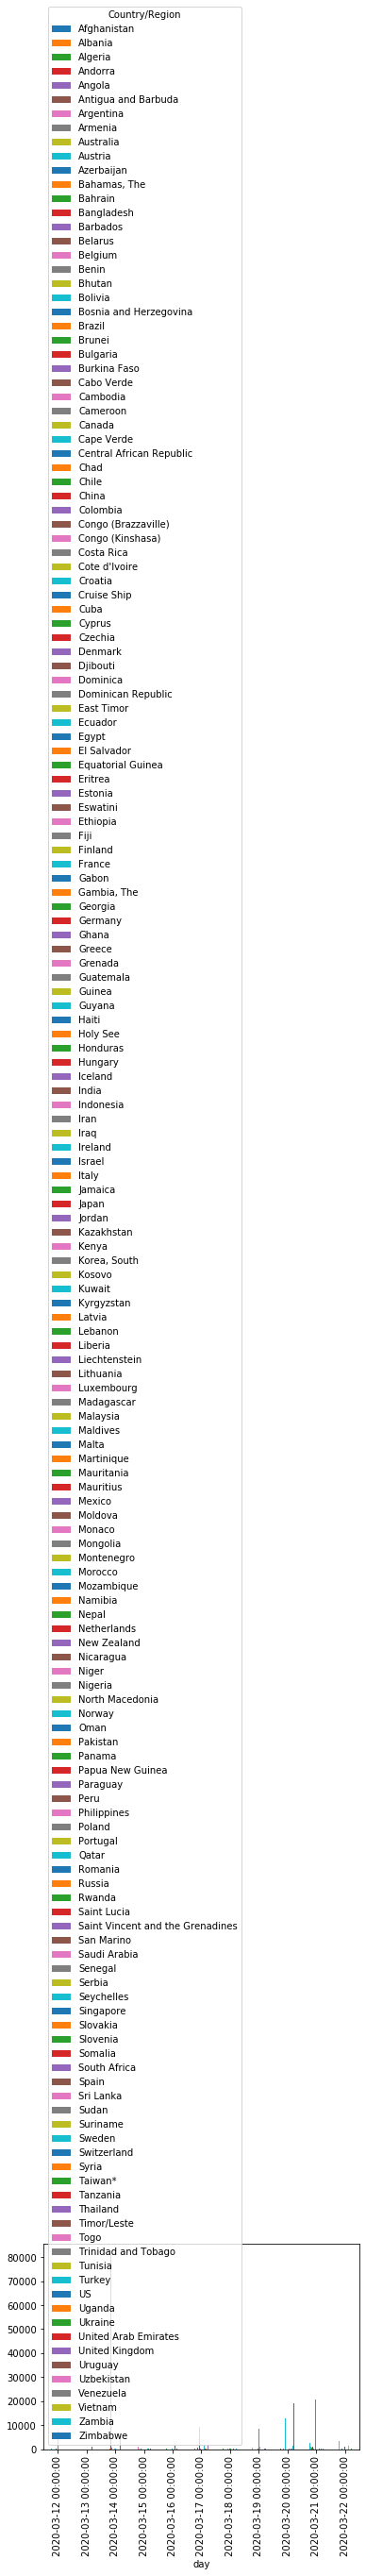

In [59]:
data_country_plot = data.plot(kind = 'bar')
date_plot.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc = 'right')
date_plot.set_title('Country-wise Plot');

In [63]:
data_1 = pd.read_csv('time_series_2019-ncov-Confirmed.csv')
cont = pd.read_csv('c2c.csv')

In [65]:
pd.concat([data_1, cont])

c:\users\nitro\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,...,3/19/20,3/20/20,3/21/20,3/22/20,Continent,Country,Country/Region,Lat,Long,Province/State
0,19.0,19.0,19.0,25.0,25.0,25.0,25.0,32.0,32.0,32.0,...,272.0,322.0,411.0,599.0,NaN,NaN,Thailand,15,101,NaN
1,20.0,20.0,20.0,22.0,22.0,45.0,25.0,25.0,26.0,26.0,...,924.0,963.0,1007.0,1086.0,NaN,NaN,Japan,36,138,NaN
2,16.0,18.0,18.0,24.0,28.0,28.0,30.0,33.0,40.0,45.0,...,345.0,385.0,432.0,455.0,NaN,NaN,Singapore,1.2833,103.8333,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,NaN,NaN,Nepal,28.1667,84.25,NaN
4,8.0,8.0,8.0,10.0,12.0,12.0,12.0,16.0,16.0,18.0,...,900.0,1030.0,1183.0,1306.0,NaN,NaN,Malaysia,2.5,112.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,South America,Paraguay,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,South America,Peru,NaN,NaN,NaN,NaN
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,South America,Suriname,NaN,NaN,NaN,NaN
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,South America,Uruguay,NaN,NaN,NaN,NaN
